# Final Exam Solution

## FINM 37500 - 2023

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# Instructions

## Please note the following:

Points
* The exam is 150 points.
* You have 180 minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.
Final Exam

Submission
* You will upload your solution to the Final Exam assignment on Canvas, where you downloaded this.
* Your submission should be readable, (the graders can understand your answers,) and it should include all code used in your analysis in a file format that the code can be executed. (ie. .ipynb preferred, .pdf is unacceptable.)

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo--you are welcome to use the code posted there without citation, (only for this exam.)

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

This exam makes use of the following data files:
* `exam_data_2023-05-05.xlsx`

This file has sheets for...
* curve data - discount factors and forward volatilities
* BDT tree of rates (continuously compounded, as usual)

If useful, the following code loads the two sheets:

```
FILEIN = '../data/exam_data_2023-05-05.xlsx'
sheet_curves = 'rate curves'
sheet_tree = 'rate tree'

curves = pd.read_excel(FILEIN, sheet_name=sheet_curves).set_index('tenor')
ratetree = pd.read_excel(FILEIN, sheet_name=sheet_tree).set_index('state')
ratetree.columns.name = 'time'
```

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 50     |
| 2       | 30     |
| 3       | 20     |
| 4       | 15     |
| 5       | 25     |
| 6       | 10     |

### Each numbered question is worth 5pts unless otherwise noted.

# 1. Short Answer

### No Data Needed

These problem does not require any data file. Rather, analyze the situation conceptually, based on the information below. 

A few questions may require simple arithmetic.

## 1.1

Consider a future on a 5-year treasury. If the exchange changes the treasury futures conversion factor to use a 3\% discount instead of 6\%, would you expect substantial changes to the...
* the futures price?
* the forward price of the underlying CTD treasury?

Explain.

# **<span style="color:red">Solution 1</span>**

## **<span style="color:red">1.1</span>**

We should expect
* the futures price to adjust almost immediately to offset the change in the conversion factor. (Conversion factor is getting bigger, so futures price will decrease accordingly, such that the converted futures price remains about the same.)

* the forward price to stay the same. Arbitrage will keep it in alignment with the bond price and carry, which is not impacted here. Or equivalently, it will be in line with the converted futures price, not the conversion factor alone.

## 1.2

Explain how SABR allows for an extra "channel" of delta hedging.

## **<span style="color:red">1.2</span>**

When the underlying changes, it has a direct impact on the Black valuation of the derivative. This is the classic "delta". 

However, changes to the underlying often correspond to changes in the implied volatility. Black's model does not model this directly, but rather assumes a constant volatility. 

SABR's stochastic volatility models changes to volatility due to changes in the underlying. Accordingly, there is an extra channel of the derivative price changing with vol ("vega") scaled by changes of vol due to shifts in the underlying.

## 1.3

Local volatility fits quoted volatilities exactly, whereas SABR does not.

What advantage does SABR have over local volatility? How does it relate to the fact above?

## **<span style="color:red">1.3</span>**

Local volatility is, in a sense, overfit to the current observed quotes, (which is why it fits them exactly.) As usual, we see that overfit models due worse out of sample.

Empirically, the structured approach of SABR (with fewer parameters) fits out of sample much better. That is, it does a better job of modeling the vol-underlying relationship mentioned above.

## 1.4
Relative to three years ago, do you think BDT or Ho-Lee is better suited to today's interest rates?

Explain.

## **<span style="color:red">1.4</span>**

BDT uses a log-normal model which ensures rates do not go negative, nor have as much flexibility for near-zero values. Ho-Lee is a normal model which allows both.

Accordingly, with rates having risen substantially in the past three years, (no longer near zero,) BDT is more appealing.

## 1.5
True or False: To value a caplet in Black's formula, we input the spot interest rate as the underlying.

Explain.

## **<span style="color:red">1.5</span>**

False. Black's formula, (unlike Black-Scholes,) uses the **forward** as the underlying, not the spot. This is one of the operational differences with Black's formula relative to Black Scholes. 

## 1.6
Should we expect a delta-hedged callable bond to underperform or overperform a delta-hedged vanilla bond? Explain.

## **<span style="color:red">1.6</span>**

We saw that the callable bond is short a call option (from the holder's perspective,) and thus has negative convexity. Accordingly, it will underperform the usual positive convexity of a vanilla bond.

## 1.7
True or False: In a frictionless market, gross basis and net basis are nonzero before maturity, but they converge to zero for the CTD bond at maturity.

## **<span style="color:red">1.7</span>**

False. For the CTD, the net basis should (in a frictionless market) be zero at every point in time. And the gross basis will be non-zero at $t<T$, but it will converge to zero at $T$.

## 1.8
True or False: Bonds with higher coupons have larger "forward drops".

## **<span style="color:red">1.8</span>**

True, if by larger we mean a more positive difference of spot minus forward.

The forward drop refers to the frequent situation where the forward price of the bond is lower than the spot price of the bond. However, we saw the opposite can be true, (a negative forward drop.)

In any case, the difference between spot and forward will roughly equal the coupon rate minus the repo rate. Thus, the larger the coupon, the larger this spread, (though it may still be negative.)

In Solution 3 we saw the calculation is a bit more tedious to account for accrued interest and day-count.

## 1.9
Which, if either, of the following statements are true?

1. The CTD bond is the bond with lowest price.
2. The CTD bond is the bond with the lowest duration.

## **<span style="color:red">1.9</span>**

Neither.
* CTD is the bond with the lowest **conversion-adjusted** price at the time of delivery.
* CTD is often the extreme duration bond, but even in those corner solutions, it could be the max or min duration based on whether rates are above or below 6\%.

## 1.10

True or False: If forward volatility is decreasing over maturity then flat volatility is also decreasing over maturity.

## **<span style="color:red">1.10</span>**

False. Flat volatility is a (type of) average of forward volatility up to that maturity. (Consider the process of extracting forward volatility.) 

Rather, if forward volatility is **less than** flat volatility, then flat volatility is decreasing.

## 1.11

True or False: From fed funds futures prices, we can extract the probability of interest rate movements for any meeting date.

## **<span style="color:red">1.11</span>**

False. We found that we can use FF futures prices to extract expected rates for any meeting date. This gave us no information about the probability distribution for the potential rates of any given date.

## 1.12

How is Black's model useful---and necessary--- in fixed income derivatives, even if we choose to use a more complex, proprietary model.

## **<span style="color:red">1.12</span>**

Black's model is the standard manner in which many vanilla derivatives are quoted. Swaptions, caps, etc quote a Black implied vol rather than a price.

Thus, even if one had no intention of modeling with Black's formula, it would still be useful for interpreting market quotes.

***

# 2. Bond Pricing

## 2.1
Use the BDT tree to price a bond.
* Time-to-maturity is 3 years
* Coupon rate is 1\%.

As usual, 
* coupons are paid semiannually.
* face value is $N=100$.

Display the tree of the bond's value, where each node is **as usual** the ex-coupon dirty price. 
* Thus, the value at node 0.5 is just after the coupon was paid.
* The value at node 0.25 includes accrued interest.

## 2.2

Display the tree of the bond's **clean price** (still ex-coupon, as usual.)

## 2.3

Consider a European **put** option on the bond.
* Expiration of the option is 1 year.
* Strike is equal to face value, $100$.
* At exercise, the option holder receives the strike plus accrued interest.

Display the tree of the option price.

## 2.4

Consider the same option, but this time **American**.

Display the tree of the option price.

## 2.5

Is there a node where the option is in-the-money, yet it is not optimal to exercise? 

Briefly explain, and if so, give an example.

## 2.6 

Consider an **amortizing bond** with 
* maturity 2.5 years.
* coupon rate of 40\%.
* Notional of \$100.

Unlike a typical bond, it pays a coupon semiannually, but it does not ever pay the face value. In that sense, one could view the coupons as amortized payments of the face value.

Value the amortizing bond and display the valuation tree.

***

# **<span style="color:red">Solution 2</span>**

## Load Packages and Data

In [1]:
import numpy as np
import pandas as pd

from datetime import date
from datetime import datetime

import sys
sys.path.insert(0, '../cmds')
from ficcvol import *
from binomial import *
from ratecurves import *
#from treasury_cmds import compound_rate

In [2]:
import datetime
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

import matplotlib.ticker as mtick
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

In [3]:
FILEIN = '../data/exam_data_2023-05-05.xlsx'
sheet_curves = 'rate curves'
sheet_tree = 'rate tree'

curves = pd.read_excel(FILEIN, sheet_name=sheet_curves).set_index('tenor')
ratetree = pd.read_excel(FILEIN, sheet_name=sheet_tree).set_index('state')
ratetree.columns.name = 'time'

In [4]:
FREQTREE = 4
dt = 1/FREQTREE

In [5]:
format_bintree(ratetree,'{:.2%}')

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00
state,,,,,,,,,,,,,
0,5.04%,5.69%,6.11%,6.49%,6.50%,7.13%,8.56%,10.37%,12.12%,16.07%,21.02%,27.78%,35.66%
1,,4.15%,4.45%,4.73%,4.74%,5.20%,6.24%,7.56%,8.84%,11.71%,15.33%,20.25%,25.99%
2,,,3.07%,3.26%,3.26%,3.58%,4.30%,5.21%,6.09%,8.07%,10.56%,13.96%,17.92%
3,,,,2.12%,2.13%,2.33%,2.80%,3.39%,3.97%,5.26%,6.88%,9.10%,11.68%
4,,,,,1.09%,1.20%,1.44%,1.74%,2.03%,2.70%,3.53%,4.66%,5.99%
5,,,,,,0.60%,0.71%,0.87%,1.01%,1.34%,1.76%,2.32%,2.98%
6,,,,,,,0.36%,0.43%,0.51%,0.67%,0.88%,1.16%,1.50%
7,,,,,,,,0.22%,0.26%,0.35%,0.46%,0.60%,0.77%
8,,,,,,,,,0.14%,0.19%,0.25%,0.33%,0.42%


## **<span style="color:red">2.1</span>**

In [6]:
N = 100
T=3
cpn = .01
cpn_freq = 2

wrapper_bond = lambda r: payoff_bond(r, dt, facevalue=N * (1+cpn/cpn_freq))

In [7]:
tsteps = int(T/dt)
ratetreeT = ratetree.iloc[:tsteps,:tsteps]

cftree = construct_bond_cftree(T, FREQTREE, cpn)

bondtree = bintree_pricing(payoff=wrapper_bond, ratetree=ratetreeT, cftree=cftree)
format_bintree(bondtree)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75
state,,,,,,,,,,,,
0,92.87,92.18,91.04,90.40,89.29,88.62,87.57,87.38,87.21,88.13,89.80,93.76
1,,95.92,94.96,94.47,93.47,92.89,91.85,91.55,91.13,91.66,92.68,95.54
2,,,97.88,97.57,96.72,96.29,95.35,95.04,94.46,94.67,95.10,97.05
3,,,,99.71,99.01,98.74,97.96,97.73,97.11,97.14,97.10,98.24
4,,,,,100.47,100.33,99.69,99.57,99.01,99.02,98.75,99.33
5,,,,,,101.15,100.58,100.52,100.00,100.01,99.63,99.92
6,,,,,,,101.02,101.00,100.49,100.49,100.06,100.21
7,,,,,,,,101.23,100.73,100.73,100.27,100.35
8,,,,,,,,,100.85,100.85,100.37,100.42


## **<span style="color:red">2.2</span>**

In [8]:
accint = construct_accint(bondtree.columns.values, FREQTREE, cpn)
cleantree = np.maximum(bondtree.subtract(accint,axis=1),0)
format_bintree(cleantree)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75
state,,,,,,,,,,,,
0,92.87,91.93,91.04,90.15,89.29,88.37,87.57,87.13,87.21,87.88,89.80,93.51
1,,95.67,94.96,94.22,93.47,92.64,91.85,91.30,91.13,91.41,92.68,95.29
2,,,97.88,97.32,96.72,96.04,95.35,94.79,94.46,94.42,95.10,96.80
3,,,,99.46,99.01,98.49,97.96,97.48,97.11,96.89,97.10,97.99
4,,,,,100.47,100.08,99.69,99.32,99.01,98.77,98.75,99.08
5,,,,,,100.90,100.58,100.27,100.00,99.76,99.63,99.67
6,,,,,,,101.02,100.75,100.49,100.24,100.06,99.96
7,,,,,,,,100.98,100.73,100.48,100.27,100.10
8,,,,,,,,,100.85,100.60,100.37,100.17


## **<span style="color:red">2.3</span>**

In [9]:
STRIKE = 100

payoff = lambda p: np.maximum(STRIKE-p,0)
puttree = bintree_pricing(payoff=payoff, ratetree=ratetreeT, undertree=bondtree)
format_bintree(puttree)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75
state,,,,,,,,,,,,
0,0.32,0.47,0.66,0.93,1.26,1.68,2.17,2.74,3.39,4.15,5.08,6.24
1,,0.18,0.28,0.42,0.62,0.89,1.25,1.69,2.23,2.84,3.56,4.46
2,,,0.09,0.15,0.23,0.37,0.56,0.84,1.22,1.71,2.29,2.95
3,,,,0.03,0.06,0.10,0.18,0.29,0.48,0.77,1.19,1.76
4,,,,,0.01,0.02,0.03,0.06,0.11,0.20,0.37,0.67
5,,,,,,0.00,0.00,0.01,0.01,0.02,0.04,0.08
6,,,,,,,0.00,0.00,0.00,0.00,0.00,0.00
7,,,,,,,,0.00,0.00,0.00,0.00,0.00
8,,,,,,,,,0.00,0.00,0.00,0.00


## **<span style="color:red">2.4</span>**

In [10]:
undertree = cleantree
puttreeAmer = bintree_pricing(payoff=payoff, ratetree=ratetreeT, undertree=undertree, style='american')
format_bintree(puttreeAmer)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75
state,,,,,,,,,,,,
0,7.13,8.07,8.96,9.85,10.71,11.63,12.43,12.87,12.79,12.12,10.20,6.49
1,,4.33,5.04,5.78,6.53,7.36,8.15,8.70,8.87,8.59,7.32,4.71
2,,,2.12,2.68,3.28,3.96,4.65,5.21,5.54,5.58,4.90,3.20
3,,,,0.55,0.99,1.51,2.04,2.52,2.89,3.11,2.90,2.01
4,,,,,0.11,0.20,0.37,0.68,0.99,1.23,1.25,0.92
5,,,,,,0.02,0.03,0.07,0.13,0.24,0.37,0.33
6,,,,,,,0.00,0.00,0.01,0.01,0.02,0.04
7,,,,,,,,0.00,0.00,0.00,0.00,0.00
8,,,,,,,,,0.00,0.00,0.00,0.00


There may be ambiguity as to whether one could exercise at $t=0$, or whether it is assumed that the transaction is the end of $t=0$. 

Either interpretation is okay. Here is the version where exercise cannot happen until $t>0$.

In [11]:
undertree = cleantree
puttreeAmer = bintree_pricing(payoff=payoff, ratetree=ratetreeT, undertree=undertree, style='american',Tamerican=dt)
format_bintree(puttreeAmer)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75
state,,,,,,,,,,,,
0,6.12,8.07,8.96,9.85,10.71,11.63,12.43,12.87,12.79,12.12,10.20,6.49
1,,4.33,5.04,5.78,6.53,7.36,8.15,8.70,8.87,8.59,7.32,4.71
2,,,2.12,2.68,3.28,3.96,4.65,5.21,5.54,5.58,4.90,3.20
3,,,,0.55,0.99,1.51,2.04,2.52,2.89,3.11,2.90,2.01
4,,,,,0.11,0.20,0.37,0.68,0.99,1.23,1.25,0.92
5,,,,,,0.02,0.03,0.07,0.13,0.24,0.37,0.33
6,,,,,,,0.00,0.00,0.01,0.01,0.02,0.04
7,,,,,,,,0.00,0.00,0.00,0.00,0.00
8,,,,,,,,,0.00,0.00,0.00,0.00


## **<span style="color:red">2.5</span>**

The table below shows nodes that are in-the-money yet not exercises. For example, state 3, time 0.75.

There is implicit option value, so using up the optionality must be worth, and if in-the-money by a little while high optionality remains, we may be better off not exercising. 

#### **<span style="color:blue">Pedagogical Point</span>**
This came up with regard to whether we would always deliver early if short a treasury futures in a time where carry is negative. For this same concept, we argued that it would depend on the specifics.

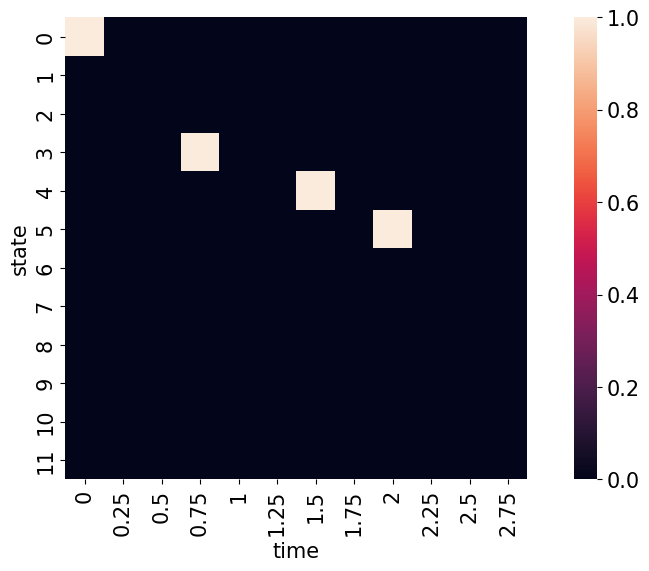

In [12]:
inmoney = payoff(undertree)>0
exer = exercise_decisions(payoff,undertree,puttreeAmer)
sns.heatmap(inmoney*1 - exer*1,square=True);

## **<span style="color:red">2.6</span>**

In [13]:
N = 100
T=2.5
cpn_freq = 2
cpn = 1/(T)

tsteps = int(T/dt)
ratetreeT = ratetree.iloc[:tsteps,:tsteps]

wrapper_bond = lambda r: payoff_bond(r, dt, facevalue= N * (cpn/cpn_freq))

In [14]:
cftree = construct_bond_cftree(T, FREQTREE, cpn)
format_bintree(cftree)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25
state,,,,,,,,,,
0,0.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00
1,0.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00
2,0.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00
3,0.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00
4,0.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00
5,0.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00
6,0.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00
7,0.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00
8,0.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00


In [15]:
bondtree = bintree_pricing(payoff=wrapper_bond, ratetree=ratetreeT, cftree=cftree)
format_bintree(bondtree)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25
state,,,,,,,,,,
0,94.17,94.51,75.12,75.61,56.30,56.75,37.40,37.92,18.74,19.21
1,,96.21,76.61,76.93,57.40,57.69,38.14,38.49,19.09,19.42
2,,,77.82,78.01,58.30,58.47,38.75,38.98,19.37,19.60
3,,,,78.82,58.99,59.08,39.25,39.37,19.61,19.74
4,,,,,59.49,59.53,39.61,39.68,19.80,19.87
5,,,,,,59.77,39.81,39.84,19.90,19.93
6,,,,,,,39.90,39.92,19.95,19.97
7,,,,,,,,39.96,19.97,19.98
8,,,,,,,,,19.99,19.99


#### **<span style="color:blue">Pedagogical Point</span>**
Verify final answer using approach from FINM 37400 Final Exam

In [16]:
tcpn = 0.5
idT1 = curves.index.get_loc(tcpn)
idT = curves.index.get_loc(T)

p_amort = (curves['discounts'].iloc[idT1:idT+1:2] * N * cpn/cpn_freq).sum()
display(f'Price of amortized bond: ${p_amort:.2f}')

'Price of amortized bond: $94.17'

***

# 3 Floorlet

## 3.1 (5pts)

Consider a **floorlet** with
* Strike is $0.06$
* Notional $N=100$

As usual, the floorlet has a one-quarter lag between when the payoff is determined and when it is received.
* determined at $T=2$
* payoff at $T=2.25$.

Use the BDT tree of rates to value the floorlet. Display the valuation tree.

## 3.2 (5pts)

Regardless of your price above, assume the market is quoting the floorlet at a price of \$0.80.

Use Black's formula to calculate the implied volatility of this floorlet, supposing the underlying is currently 3.5\%.

## 3.3 (5pts)

Based on your answers to 3.1 and 3.2, is the OAS positive or negative? Explain.

## 3.4 (5pts)

Consider a floorlet which pays immediately upon the payoff being determined rather than having the one-quarter lag.

Price this alternate floorlet and display the valuation tree.

***

# **<span style="color:red">Solution 3</span>**

## **<span style="color:red">3.1</span>**

In [17]:
freqcap = 4
STRIKE = .06
N = 100
Tset = 2
Tpay = Tset + 1/freqcap

In [18]:
tsteps = int(Tset/dt)
ratetreeT = ratetree.iloc[:tsteps,:tsteps]
refratetree = compound_rate(ratetreeT,None,freqcap)
format_bintree(refratetree,style='{:.2%}')

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75
state,,,,,,,,
0,5.07%,5.74%,6.16%,6.54%,6.55%,7.20%,8.65%,10.50%
1,,4.17%,4.48%,4.76%,4.76%,5.23%,6.29%,7.63%
2,,,3.08%,3.27%,3.28%,3.60%,4.32%,5.24%
3,,,,2.13%,2.13%,2.34%,2.81%,3.41%
4,,,,,1.09%,1.20%,1.44%,1.74%
5,,,,,,0.60%,0.72%,0.87%
6,,,,,,,0.36%,0.43%
7,,,,,,,,0.22%


In [19]:
payoff = lambda r: N * dt * np.maximum(STRIKE-r,0)
floorlettree = bintree_pricing(payoff=payoff, ratetree=ratetreeT, undertree= refratetree, cfdelay=True)
format_bintree(floorlettree,style='{:.3f}')

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75
state,,,,,,,,
0,0.745,0.597,0.439,0.282,0.144,0.045,0.000,0.000
1,,0.912,0.772,0.610,0.430,0.248,0.092,0.000
2,,,1.070,0.953,0.804,0.622,0.410,0.187
3,,,,1.204,1.117,0.999,0.845,0.642
4,,,,,1.305,1.246,1.166,1.059
5,,,,,,1.372,1.333,1.281
6,,,,,,,1.415,1.390
7,,,,,,,,1.443


## **<span style="color:red">3.2</span>**

In [20]:
PX_FLOORLET = .80
F = .035

wrapper = lambda vol: (N * freqcap * blacks_formula(T,vol,STRIKE,F,discount=curves.loc[T,'discounts']) - PX_FLOORLET)**2
ivol = fsolve(wrapper,.3)[0]
display(f'Implied volatility for price of {PX_FLOORLET:.2f} is {ivol:.2%}')

'Implied volatility for price of 0.80 is 35.13%'

## **<span style="color:red">3.3</span>**

The modeled price in 3.1 is below the quoted price in 3.2. This implies a **negative OAS**. That is, if our model is correct, this market quote would yield a worse rate than can be achieved in the market otherwise.

## **<span style="color:red">3.4</span>**

In [21]:
payoff = lambda r: N * dt * np.maximum(STRIKE-r,0)
floorlettree = bintree_pricing(payoff=payoff, ratetree=ratetreeT, undertree= refratetree, cfdelay=False)
format_bintree(floorlettree,style='{:.3f}')

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75
state,,,,,,,,
0,0.749,0.601,0.442,0.285,0.146,0.046,0.000,0.000
1,,0.915,0.776,0.614,0.433,0.250,0.093,0.000
2,,,1.074,0.956,0.808,0.626,0.414,0.189
3,,,,1.207,1.120,1.004,0.850,0.648
4,,,,,1.307,1.248,1.169,1.064
5,,,,,,1.374,1.335,1.283
6,,,,,,,1.416,1.391
7,,,,,,,,1.444


As expected, getting the payoff sooner leads to a higher valuation at every node.

#### **<span style="color:blue">Pedagogical Point</span>**
One interesting thing about this contemporaneous-floorlet is that it can be used to model a call option on a STIR futures contract, (ignoring daily settlement.)

Suppose we are at time $0$, the option expires at $t$, and the underlying future expires at $T$. Let $\Pi_t$ denote the payoff of the call on the STIR future at time $t$:

$$\begin{align*}
\Pi_t &= \max(F_{t\to T} - K,0)\\
&= 100\max\left((1-f_{t\to T}) - (1-r_K), 0\right)\\
&= 100\max(r_K-f_{t\to T},0)\\
\end{align*}$$

where $r_K$ is the strike quoted as a rate and $f_{t\to T}$ here denotes the futures rate rather than price.

This is a contemporaneous floorlet where the underlying is the futures rate rather than the spot rate.

***

# 4. Swaps

## 4.1 

Consider a **paying-fixed** swap which resets (and make payments) **quarterly**.
* Maturity is $T=3$
* Notional is $N=100$.
* Swap rate is 3.53\%.
* The floating rate is the quarterly compounded interest rate.

(Recall that paying-fixed means you pay the swap rate and receive the floating rate.)

Display the cashflow tree.

## 4.2

Display the value tree.

## 4.3

Consider a **european** swaption, (option to enter into the paying-fixed swap).
* expiration is $T=1$
* there is no strike at exercise.
    - could think of this as a strike of 0
    - but often referred to as a strike of 3.53\%, the fixed rate on the underlying swap
    
Display the swaption valuation tree.

***

# **<span style="color:red">Solution 4</span>**

## **<span style="color:red">4.1</span>**

In [22]:
freqswap = 4
T=3
N = 100

STRIKE = .0353
payoff = lambda r: N * dt * (r-STRIKE)

In [23]:
tsteps = int(T/dt)
ratetreeT = ratetree.iloc[:tsteps,:tsteps]
refratetree = freqcap * (np.exp(ratetreeT / FREQTREE)-1)

In [24]:
cftree = payoff(refratetree)
format_bintree(cftree)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75
state,,,,,,,,,,,,
0,0.39,0.55,0.66,0.75,0.75,0.92,1.28,1.74,2.19,3.22,4.51,6.31
1,,0.16,0.24,0.31,0.31,0.43,0.69,1.02,1.35,2.09,3.02,4.31
2,,,-0.11,-0.06,-0.06,0.02,0.20,0.43,0.65,1.16,1.79,2.67
3,,,,-0.35,-0.35,-0.30,-0.18,-0.03,0.11,0.44,0.85,1.42
4,,,,,-0.61,-0.58,-0.52,-0.45,-0.37,-0.21,0.00,0.29
5,,,,,,-0.73,-0.70,-0.67,-0.63,-0.55,-0.44,-0.30
6,,,,,,,-0.79,-0.77,-0.76,-0.71,-0.66,-0.59
7,,,,,,,,-0.83,-0.82,-0.80,-0.77,-0.73
8,,,,,,,,,-0.85,-0.84,-0.82,-0.80


## **<span style="color:red">4.2</span>**

In [25]:
swaptree = bintree_pricing(payoff=payoff, ratetree=ratetreeT, undertree= refratetree, cftree=cftree, cfdelay=True)
format_bintree(swaptree)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75
state,,,,,,,,,,,,
0,-0.01,1.55,3.04,4.52,5.99,7.51,8.91,9.94,10.45,10.36,9.02,5.89
1,,-2.34,-1.01,0.34,1.70,3.15,4.55,5.71,6.47,6.79,6.12,4.10
2,,,-4.03,-2.85,-1.63,-0.33,0.98,2.16,3.11,3.75,3.68,2.58
3,,,,-5.06,-3.98,-2.84,-1.68,-0.57,0.42,1.25,1.66,1.39
4,,,,,-5.48,-4.47,-3.44,-2.45,-1.51,-0.64,-0.00,0.29
5,,,,,,-5.31,-4.36,-3.42,-2.51,-1.64,-0.88,-0.30
6,,,,,,,-4.81,-3.90,-3.01,-2.14,-1.32,-0.59
7,,,,,,,,-4.14,-3.25,-2.38,-1.53,-0.73
8,,,,,,,,,-3.38,-2.50,-1.64,-0.80


#### **<span style="color:blue">Pedagogical Point</span>**

Note that the swap value is (approximately) zero. That is because the strike was chosen to be the (rounded) swap rate implicit in the discount factors. 

## **<span style="color:red">4.3</span>**

In [26]:
T = 1
tsteps = int(T/dt)+1

payoff = lambda v: np.maximum(v,0)

swaptreeT = swaptree.iloc[:tsteps,:tsteps]

swaption_tree = bintree_pricing(payoff=payoff,  ratetree=ratetree, undertree= swaptreeT)
format_bintree(swaption_tree)

time,0.00,0.25,0.50,0.75,1.00
state,,,,,
0,0.76,1.33,2.28,3.78,5.99
1,,0.21,0.42,0.84,1.70
2,,,0.00,0.00,0.00
3,,,,0.00,0.00
4,,,,,0.00


Note that though the swap is priced correctly, (~0), the swaption has substantial value given the optionality.

## **<span style="color:blue">Pedagogical Point</span>**

We know a paying-fixed swap is equivalent to a long-short position in a floating-fixed bond.

We could thus value the swap, (though 4.1 specifically asked for the cashflow tree, so this would only help for 4.2.) To do so, we must consider a bond that pays coupons at the same frequency that the swap resets/pays. Thus, we need to value a quarterly-paying bond.

In [27]:
N = 100
T=3
cpn = STRIKE
cpn_freq = freqswap

wrapper_bond = lambda r: payoff_bond(r, dt, facevalue=N * (1+cpn/cpn_freq))

In [28]:
tsteps = int(T/dt)
ratetreeT = ratetree.iloc[:tsteps,:tsteps]

cftree = construct_bond_cftree(T, FREQTREE, cpn, cpn_freq=cpn_freq)
format_bintree(cftree)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75
state,,,,,,,,,,,,
0,0.00,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88
1,0.00,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88
2,0.00,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88
3,0.00,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88
4,0.00,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88
5,0.00,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88
6,0.00,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88
7,0.00,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88
8,0.00,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88


In [29]:
bondtree = bintree_pricing(payoff=wrapper_bond, ratetree=ratetreeT, cftree=cftree)
swaptree_alt = N - bondtree
format_bintree(swaptree_alt)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75
state,,,,,,,,,,,,
0,-0.01,1.55,3.04,4.52,5.99,7.51,8.91,9.94,10.45,10.36,9.02,5.89
1,,-2.34,-1.01,0.34,1.70,3.15,4.55,5.71,6.47,6.79,6.12,4.10
2,,,-4.03,-2.85,-1.63,-0.33,0.98,2.16,3.11,3.75,3.68,2.58
3,,,,-5.06,-3.98,-2.84,-1.68,-0.57,0.42,1.25,1.66,1.39
4,,,,,-5.48,-4.47,-3.44,-2.45,-1.51,-0.64,-0.00,0.29
5,,,,,,-5.31,-4.36,-3.42,-2.51,-1.64,-0.88,-0.30
6,,,,,,,-4.81,-3.90,-3.01,-2.14,-1.32,-0.59
7,,,,,,,,-4.14,-3.25,-2.38,-1.53,-0.73
8,,,,,,,,,-3.38,-2.50,-1.64,-0.80


As expected, we have matched the value of the swap tree.

This method of valuing the swap is quite useful, as the first method can only be done via binomial tree if the frequency of the tree matches the frequency of the swap payments. Contrast that with the bond replication approach which can be done for any granularity of time grid.

***

# 5. Treasury Futures

## 5.1

Consider a bond with
* Market (clean) price of 97.50
* Futures conversion ratio of 0.95
* Futures price is 103.

It has
* Coupon rate of 1\% 
* face value of 100.

As for the coupon timing,
* The bond paid a coupon 38 days ago.
* It will pay another coupon in 144 days.
* The repo rate over the next 90 days is (annualized in the usual way) 5\%.

Calculate the forward price of the bond for delivery in 90 days. 

## 5.2

Calculate the gross and net basis of the bond.

## 5.3

*Unrelated to 5.1 and 5.2...*

Suppose you are pricing a futures contract on the 5-year treasury. The contract expires in 1 year, $T=1$.

Based on the deliverable bonds, we find the CTD prices at expiration as listed in the table for each state.

| state |CTD Converted Clean Price at $T=1$ |
|--------|--------|
|0   | 99.05|
|1       |102.47 |
|2       | 105.31|
|3       |107.62 |
| 4      |109.79|

Using the table, calculate the price of the futures contract.

*Note that there is no need to build trees of the underlying bonds and figure out the CTD for each state. All that has been done, and you have the table above.*

***

# **<span style="color:red">Solution 5</span>**

#### Provided Data

In [30]:
N = 100
spot = 97.50
cpn = .01
repo = .25*.05

fut = 103
convert = .95

## **<span style="color:red">5.1</span>**

Note that there is no interim coupon happening during the forward interval.

Thus, the calculation is quite simple, as discussed in Solution 3.

In [31]:
acc0 = N * cpn * 38/(38+144)
acc1 = N * cpn * 144/(38+144)

fwd = (spot + acc0) * (1+repo) - acc1

tab = pd.DataFrame(spot,index=['bond metrics'],columns=['spot price'])
tab['forward price'] = fwd
tab['converted futures price'] = fut * convert
tab.style.format('{:.2f}')

,spot price,forward price,converted futures price
bond metrics,97.50,98.14,97.85


## **<span style="color:red">5.2</span>**

In [32]:
tab[['gross basis','net basis']] = np.array([spot, fwd]) - fut * convert
tab.style.format('{:.2f}')

,spot price,forward price,converted futures price,gross basis,net basis
bond metrics,97.50,98.14,97.85,-0.35,0.29


## **<span style="color:red">5.3</span>**

Recall that for a tree of futures prices, there is no discounting as we move back through the tree.

Thus, in the function below, we set the rate tree to zero.

In [33]:
T = 1

terminal_values = pd.Series([
    99.05,
    102.47,
    105.31,
    107.62,
    109.79
], index=ratetree[T].dropna().index)

payoff = lambda r: terminal_values

In [34]:
tsteps = int(T/dt)+1
ratetreeT = ratetree.replace(0).iloc[:tsteps,:tsteps]
ratetreeT[~ratetreeT.isna()] = 0

In [35]:
futtree = bintree_pricing(payoff,ratetreeT)
format_bintree(futtree)

time,0.00,0.25,0.50,0.75,1.00
state,,,,,
0,105.07,103.75,102.32,100.76,99.05
1,,106.38,105.18,103.89,102.47
2,,,107.59,106.47,105.31
3,,,,108.71,107.62
4,,,,,109.79


***

# 6. Fitting the BDT Tree

Fit a BDT Tree. We will not use it for any other questions on the exam. 


## 1
Use the discount rates provided in the data file.

Instead of using the forward volatilities, use a constant $\sigma=0.50$ at every step.

Report the estimated thetas.

## 2
Regardless of your previous answer, suppose your estimated thetas are all equal to 0.5.

Display the interest-rate tree.

***

# **<span style="color:red">Solution 6</span>**

## **<span style="color:red">6.1</span>**

In [36]:
sigma = .50
thetas, ratetree = estimate_theta(sigma,curves['discounts'])
thetas.to_frame().T.style.format('{:.2%}',na_rep='').format_index('{:.2f}',axis=1)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00
theta,,-21.68%,-46.23%,-53.73%,-82.74%,-52.01%,-22.63%,-24.76%,-44.13%,1.63%,-7.46%,-6.54%,-20.62%


#### Note
Note that in the table above, the theta value at $t$ is used to determine the tree values at $t$. This is different than how it is sometimes described in the notes, where $\theta_t$ determines values at $t+1$. The table lables things this way for convenience, but it doesn't matter if they are labeled at a shifted index.

## **<span style="color:red">6.2</span>**

In [37]:
format_bintree(ratetree,'{:.2%}')

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00
state,,,,,,,,,,,,,
0,5.04%,6.13%,7.01%,7.87%,8.22%,9.27%,11.24%,13.57%,15.61%,20.12%,25.36%,32.03%,39.06%
1,,3.72%,4.25%,4.77%,4.99%,5.62%,6.82%,8.23%,9.47%,12.20%,15.38%,19.43%,23.69%
2,,,2.58%,2.90%,3.02%,3.41%,4.14%,4.99%,5.74%,7.40%,9.33%,11.78%,14.37%
3,,,,1.76%,1.83%,2.07%,2.51%,3.03%,3.48%,4.49%,5.66%,7.15%,8.72%
4,,,,,1.11%,1.25%,1.52%,1.84%,2.11%,2.72%,3.43%,4.33%,5.29%
5,,,,,,0.76%,0.92%,1.11%,1.28%,1.65%,2.08%,2.63%,3.21%
6,,,,,,,0.56%,0.68%,0.78%,1.00%,1.26%,1.59%,1.94%
7,,,,,,,,0.41%,0.47%,0.61%,0.77%,0.97%,1.18%
8,,,,,,,,,0.29%,0.37%,0.46%,0.59%,0.72%


***